
<div>
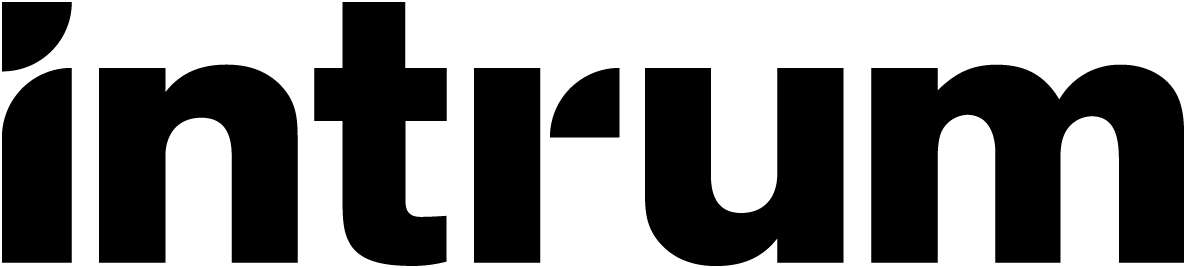
</div>


# <span style="color:#993063"> Risk Analysisis on Debt - Intrum <a name="id3"></a>

### Author: Jacky Barraza

### Notebook 2/3
    
The following report describes both my approach, method, and results to address the Intrum – Home Quiz Challenge, when exploring options for future selection for modelling purpose. 
    


#  <span style="color:#E8846F"> Setting the tools <a name="id3"></a>

### Paths

In [1]:
import os
print("My current working directory is", os.getcwd())

My current working directory is /Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/notebooks


In [16]:
config_input = '/Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/data/processed/'

config_output = '/Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/data/output/'

DATA_INTRUM = config_input + "df_clean.csv"
DATA_INTRUM

'/Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/data/processed/df_clean.csv'

### Libraries

In [5]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import savetxt

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split


import warnings 
pandas.set_option('display.max_columns', 1000)
pandas.set_option('display.max_rows', 1000)
warnings.filterwarnings('ignore')

### General Variables

In [43]:
#general
PERCENTILE = [.25, .50, .75]
INCLUDE = ['object', 'float', 'int']
NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


#palette colors
SETCOL = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
SETCOL1 = ["#6dccda", "#cdcc5d", "#a2a2a2", "#ed97ca", "#a8786e", "#ad8bc9", "#ed665d", "#67bf5c", "#ff9e4a", "#729ece"]
SETCOL2 = ["#ed665d", "#67bf5c", "#ff9e4a", "#729ece", "#ad8bc9"]
SETCOL3 = [ "#729ece", "#67bf5c", "#ff9e4a", "#ad8bc9", "#ed665d"]
SETCOL4 = [ "#6dccda", "#ed97ca", "#729ece", "#ad8bc9", "#ff9e4a"]

### Dataframe Definition

In [21]:
def dataframe_load_csv(filename):
    """
    Loading a csv as pandas dataframe
    :param filename: path where the file is located
    :return: a dataframe
    """
    df = (pandas.read_csv(filename, encoding='utf-8-sig'))
    return df

In [22]:
DATASET

'/Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/data/processed/df_clea.csv'

In [23]:
df = dataframe_load_csv(DATA_INTRUM)

In [24]:
df.head(4)

,kdate,ct090,ap090,c0039,c0044,d0031,b0007,d0009,c0031,a8404,c0019,d0027,c9008,d2112,d0012,c0015,month
0,2017-08-12,0.0,0.0,K6622,1,2.0,0.00,238.38,2.0,0.18,98.0,0.0,49.0,0.0,1,222.69,8
1,2017-02-03,0.0,0.0,K6512,2,2.0,210.53,0.00,5.0,0.25,109.0,2.0,51.0,0.0,2,212.72,2
2,2017-02-17,0.0,0.0,K6512,3,1.0,20.00,0.00,2.0,0.00,748.0,0.0,48.0,0.0,3,56.84,2
3,2017-09-18,0.0,0.0,K6622,4,1.0,20.00,54.14,3.0,1.00,8.0,0.0,27.0,0.0,4,463.15,9


In [25]:
VAR = list(df.columns)
VAR

['kdate',
 'ct090',
 'ap090',
 'c0039',
 'c0044',
 'd0031',
 'b0007',
 'd0009',
 'c0031',
 'a8404',
 'c0019',
 'd0027',
 'c9008',
 'd2112',
 'd0012',
 'c0015',
 'month']

In [26]:
def grouping_target(group):
    if group ==  0:
        return  0
    else:
        return 1

In [33]:
df['target'] = df['ct090']

In [34]:
df1 = df.copy()
df1['target'] = df['target'].apply(grouping_target)

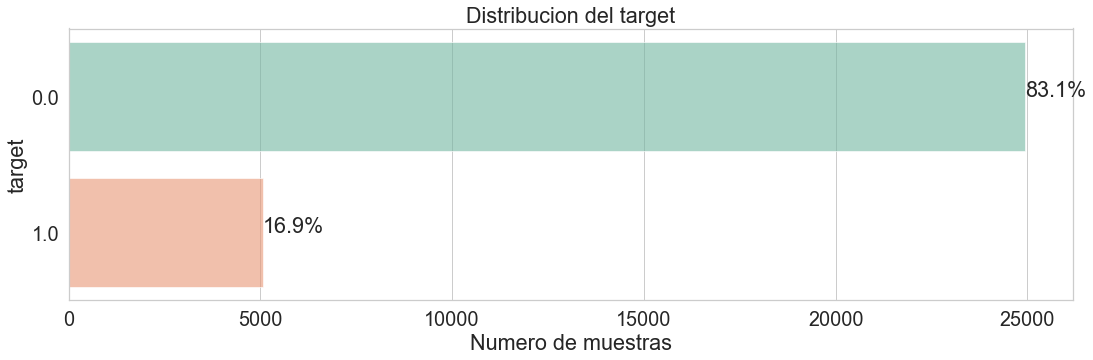

In [35]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.set(font_scale=1.8)
sns.set_style('whitegrid')

ax = sns.countplot(y="target", data=df, alpha=0.6, palette="Set2")
plt.title('Distribucion del target')
plt.xlabel('Numero de muestras')
total = len(df['target'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

>Observations:
>
>This is showing the unbalanced dataset. This will be taking into account in the modeling phase.
    

In [36]:
df.columns

Index(['kdate', 'ct090', 'ap090', 'c0039', 'c0044', 'd0031', 'b0007', 'd0009',
       'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'd0012', 'c0015',
       'month', 'target'],
      dtype='object')

In [38]:
df_intrum = df.filter(['ap090', 'c0039', 'c0044', 'd0031', 'b0007', 'd0009',
       'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'd0012', 'c0015',
       'month', 'target'])
df_intrum.shape

(30000, 16)

In [44]:
def columns_as_list(df):
    """
    Variables as a list by type
    :param df: dataframe
    :return: three list of variables
    """
    all_var = list(df.columns)
    print("----------------------------------------------------------------")
    print("List of all variables: \n")
    print(all_var)
    obj_var = list(df.select_dtypes(['object']).columns)
    if obj_var: 
        print("----------------------------------------------------------------")
        print("List of object variabless: \n")
        print(obj_var)
    
    num_var = list(df.select_dtypes(include=NUMERICS))
    if num_var: 
        print("----------------------------------------------------------------")
        print("List of numeric variable: \n")
        print(num_var)
    
    return all_var, obj_var, num_var 

In [45]:
all_var_metadf, obj_var_metadf, num_var_metadf  = columns_as_list(df_intrum)

----------------------------------------------------------------
List of all variables: 

['ap090', 'c0039', 'c0044', 'd0031', 'b0007', 'd0009', 'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'd0012', 'c0015', 'month', 'target']
----------------------------------------------------------------
List of object variabless: 

['c0039']
----------------------------------------------------------------
List of numeric variable: 

['ap090', 'c0044', 'd0031', 'b0007', 'd0009', 'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'd0012', 'c0015', 'month', 'target']


###  <span style="color:#67bf5c"> Definicion de X y Y para los modelos <a name="id3"></a>

In [39]:
df1_intrum = df_intrum.copy()
df1_intrum.shape

(30000, 16)

In [46]:
df_num_var = df1_intrum.copy()
df_num_var.drop(['c0039'], axis = 1, inplace = True)
df_num_var.head(4)

,ap090,c0044,d0031,b0007,d0009,c0031,a8404,c0019,d0027,c9008,d2112,d0012,c0015,month,target
0,0.0,1,2.0,0.00,238.38,2.0,0.18,98.0,0.0,49.0,0.0,1,222.69,8,0.0
1,0.0,2,2.0,210.53,0.00,5.0,0.25,109.0,2.0,51.0,0.0,2,212.72,2,0.0
2,0.0,3,1.0,20.00,0.00,2.0,0.00,748.0,0.0,48.0,0.0,3,56.84,2,0.0
3,0.0,4,1.0,20.00,54.14,3.0,1.00,8.0,0.0,27.0,0.0,4,463.15,9,0.0


In [48]:
df1_intrum.drop(['target'], axis =1, inplace=True)

In [49]:
df1_intrum_mdldu = pandas.get_dummies(df1_intrum)
df1_intrum_mdldu.shape

(30000, 20)

In [51]:
feature_names = list(df1_intrum_mdldu.columns)
feature_names

['ap090',
 'c0044',
 'd0031',
 'b0007',
 'd0009',
 'c0031',
 'a8404',
 'c0019',
 'd0027',
 'c9008',
 'd2112',
 'd0012',
 'c0015',
 'month',
 'c0039_K6419',
 'c0039_K6499',
 'c0039_K6512',
 'c0039_K6619',
 'c0039_K6622',
 'c0039_K_others']

####  <span style="color:#28BAE5"> X y Y Arrays  <a name="id3"></a>

In [53]:
X = df1_intrum_mdldu[feature_names].values
y = df_intrum['target'].values
X.shape, y.shape

((30000, 20), (30000,))

####  <span style="color:#28BAE5"> Variables Normalization<a name="id3"></a>

In [54]:
MMS = MinMaxScaler()
X2 = MMS.fit_transform(X)

###  <span style="color:#67bf5c"> Feature Selection <a name="id3"></a>

####  <span style="color:#28BAE5"> Selección univariante de características  <a name="id3"></a>

In [56]:
vt_feature_selector = VarianceThreshold(threshold=0)
vt_feature_selector.fit(X2)
df_var_select = df1_intrum_mdldu[df1_intrum_mdldu.columns[vt_feature_selector.get_support(indices=True)]]
feature_names2 = df_var_select.columns.to_list()
df_var_select.shape

(30000, 20)

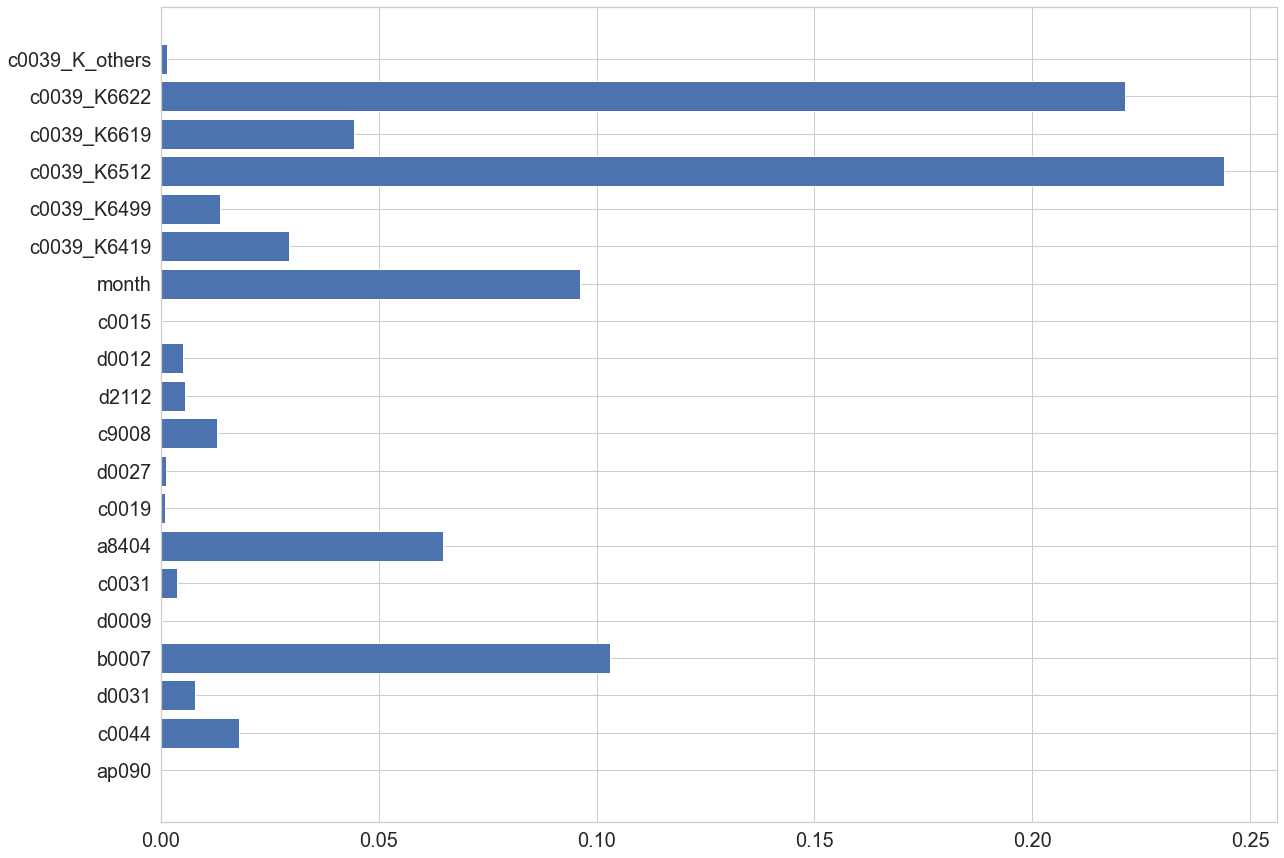

In [57]:
fig, ax = plt.subplots(figsize = (20, 15))

sns.set(font_scale=2.2, palette="Set2")
ax.barh(feature_names2, vt_feature_selector.variances_)
plt.show()

>#### Observations:
>
>The variable c0015, ap090 and d009 have 0 variance and will be exclude of the model. Variables with a higher variance may contain more useful information. 

In [59]:
df1_intrum_mdldu.columns

Index(['ap090', 'c0044', 'd0031', 'b0007', 'd0009', 'c0031', 'a8404', 'c0019',
       'd0027', 'c9008', 'd2112', 'd0012', 'c0015', 'month', 'c0039_K6419',
       'c0039_K6499', 'c0039_K6512', 'c0039_K6619', 'c0039_K6622',
       'c0039_K_others'],
      dtype='object')

In [60]:
feature_namesf = ['c0044', 'd0031', 'b0007', 'c0031', 'a8404', 'c0019',
       'd0027', 'c9008', 'd2112', 'd0012', 'month', 'c0039_K6419',
       'c0039_K6499', 'c0039_K6512', 'c0039_K6619', 'c0039_K6622',
       'c0039_K_others']

####  <span style="color:#28BAE5"> "X" and "Y" Arrays  <a name="id3"></a>

In [61]:
X = df1_intrum_mdldu[feature_namesf].values
y = df_intrum['target'].values
X.shape, y.shape

((30000, 17), (30000,))

####  <span style="color:#28BAE5"> Variables Normalization<a name="id3"></a>

In [62]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X2 = MMS.fit_transform(X)

###  <span style="color:#67bf5c"> Validation = Train and Test <a name="id3"></a>

In [65]:
from sklearn.model_selection import train_test_split

# set aside 10% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X2, y,
    test_size=0.05, shuffle = True, random_state = 8, stratify = y)

# the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8, stratify = y_train)

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))
print("X_train shape: {}".format(X_train.shape))
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X shape: (30000, 17)
y shape: (30000,)
X_train shape: (21375, 17)
X_train shape: (21375, 17)
y_train shape: (21375,)
X_test shape: (1500, 17)
y_test shape: (1500,)
X_val shape: (7125, 17)
y_val shape: (7125,)


#  <span style="color:#E8846F"> Output <a name="id3"></a>
#### Exporting the dataset splited for next steps on the models

In [66]:
savetxt((config_output + "X.csv"), X, delimiter=',')
savetxt((config_output + "y.csv"), y, delimiter=',')
savetxt((config_output + "X_train.csv"), X_train, delimiter=',')
savetxt((config_output + "y_train.csv"), y_train, delimiter=',')
savetxt((config_output + "X_test.csv"), X_test, delimiter=',')
savetxt((config_output + "y_test.csv"), y_test, delimiter=',')
savetxt((config_output + "X_val.csv"), X_val, delimiter=',')
savetxt((config_output + "y_val.csv"), y_val, delimiter=',')